1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [17]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2

In [6]:
dataframe.describe()

duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.000000  378.000000    2.000000

In [20]:
dataframe.median()

duracion    13.0
paginas      2.0
acciones     6.0
valor       20.0
clase        0.0
dtype: float64

In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


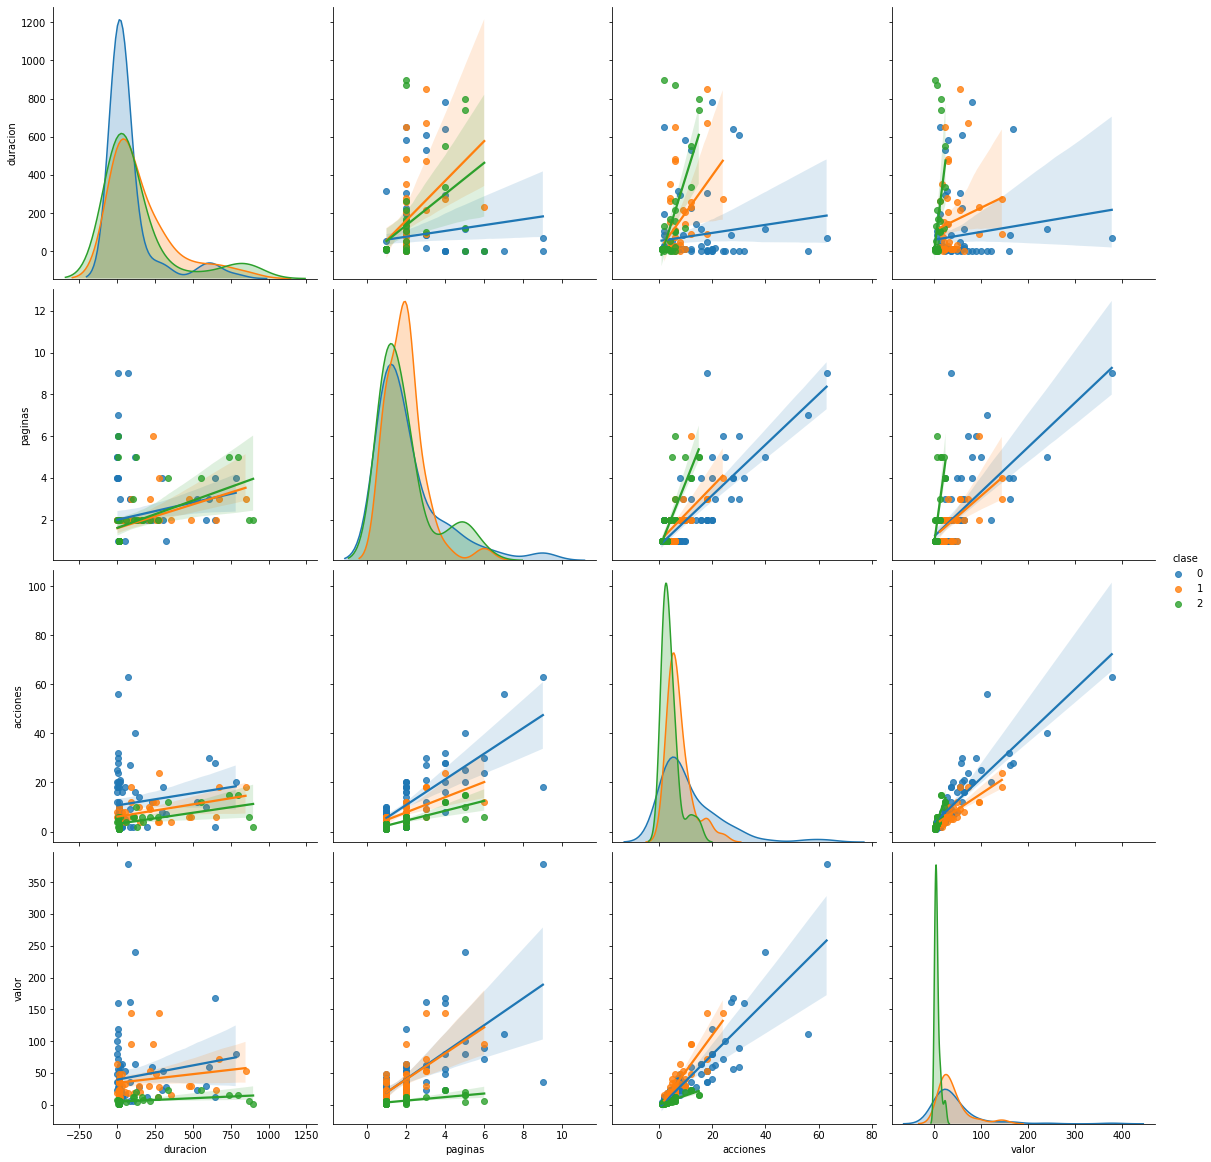

In [6]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

In [5]:
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

¿Qué acierto tiene? (score)
¿Cuál es el RMSE? ¿Dirías que es un valor alto?
Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
¿Es la regresión un buen método para este dataset?

In [40]:
import numpy as np
import sklearn.metrics as metrics
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [25]:
X = np.array(dataframe.drop(['duracion'], 1))
y = np.array(dataframe['duracion'])
X.shape

(170, 4)

In [28]:
y = np.array(y)

In [30]:
y

array([  7.   ,  21.   ,  57.   , 101.   , 109.   , 125.   , 133.   ,
       162.   , 170.   , 217.   , 266.   , 335.   , 553.   , 798.   ,
       872.   ,   1.105,   2.091,  21.   ,  33.   ,  49.   ,  74.   ,
        93.   , 145.   , 152.   , 208.   , 219.   , 235.   , 257.   ,
       266.   , 275.   , 355.   , 473.   , 485.   , 652.   , 848.   ,
         2.   ,   9.   , 739.   , 898.   ,   1.401,  11.   ,  31.   ,
        51.   ,  89.   , 112.   , 278.   , 674.   ,   1.088,   1.294,
         1.   ,   2.   ,   7.   ,  10.   ,  12.   ,  14.   ,  20.   ,
        23.   ,  50.   ,  54.   ,  68.   ,  85.   ,  86.   ,  87.   ,
       105.   , 116.   , 117.   , 146.   , 195.   , 230.   , 293.   ,
       304.   , 319.   , 530.   , 584.   , 608.   , 643.   , 649.   ,
       783.   ,   1.169,   1.284,   1.425,   1.478,   1.59 ,   2.041,
         2.695,   3.085,  15.   ,  29.   ,  30.   ,   1.064,  15.   ,
        29.   ,  30.   ,   1.064,  11.   ,  12.   ,  13.   ,  11.   ,
        12.   ,  13.

In [32]:
y.reshape(1,-1)

array([[  7.   ,  21.   ,  57.   , 101.   , 109.   , 125.   , 133.   ,
        162.   , 170.   , 217.   , 266.   , 335.   , 553.   , 798.   ,
        872.   ,   1.105,   2.091,  21.   ,  33.   ,  49.   ,  74.   ,
         93.   , 145.   , 152.   , 208.   , 219.   , 235.   , 257.   ,
        266.   , 275.   , 355.   , 473.   , 485.   , 652.   , 848.   ,
          2.   ,   9.   , 739.   , 898.   ,   1.401,  11.   ,  31.   ,
         51.   ,  89.   , 112.   , 278.   , 674.   ,   1.088,   1.294,
          1.   ,   2.   ,   7.   ,  10.   ,  12.   ,  14.   ,  20.   ,
         23.   ,  50.   ,  54.   ,  68.   ,  85.   ,  86.   ,  87.   ,
        105.   , 116.   , 117.   , 146.   , 195.   , 230.   , 293.   ,
        304.   , 319.   , 530.   , 584.   , 608.   , 643.   , 649.   ,
        783.   ,   1.169,   1.284,   1.425,   1.478,   1.59 ,   2.041,
          2.695,   3.085,  15.   ,  29.   ,  30.   ,   1.064,  15.   ,
         29.   ,  30.   ,   1.064,  11.   ,  12.   ,  13.   ,  11.   ,
      

In [33]:
y.shape

(170,)

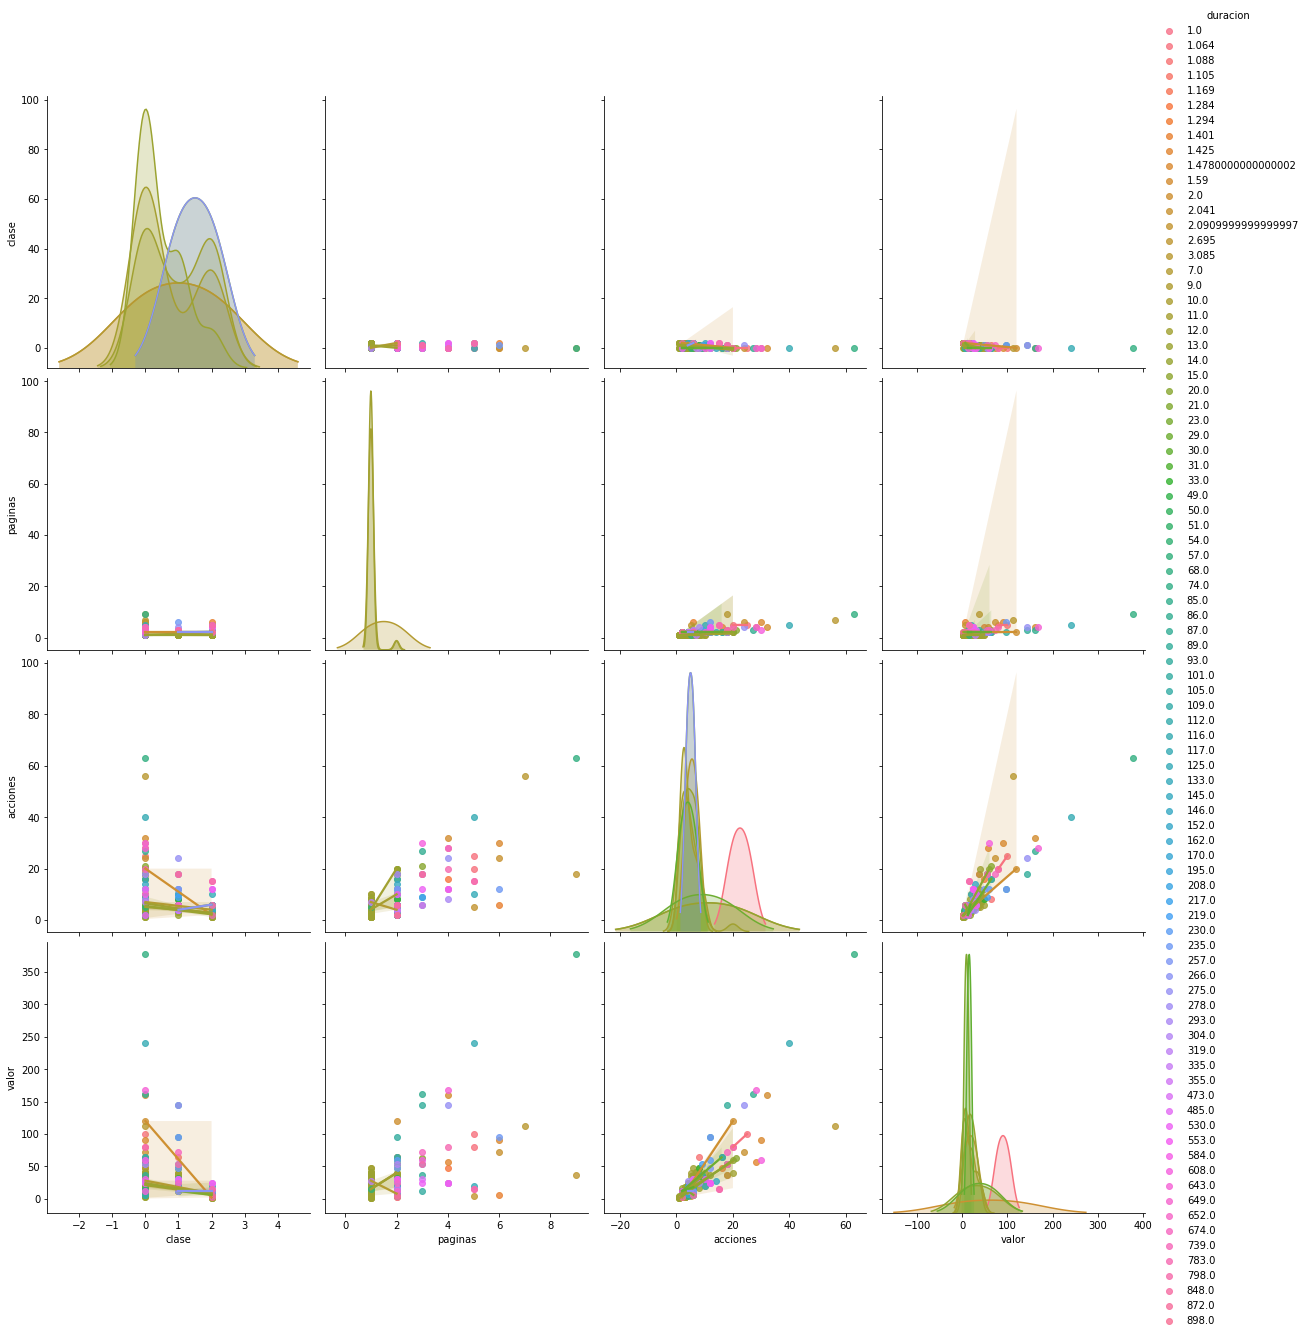

In [14]:
sb.pairplot(dataframe.dropna(), hue='duracion',size=4,vars=["clase", "paginas","acciones","valor"],kind='reg')

In [21]:
newdf = dataframe.groupby('duracion').quantile(q=0.5)
newdf

paginas  acciones  valor  clase
duracion                                 
1.000         2.0      18.0   36.0    0.0
1.064         5.0      22.5   90.0    0.0
1.088         2.0       8.0   64.0    1.0
1.105         2.0       4.0    8.0    2.0
1.169         4.0      12.0   24.0    0.0
...           ...       ...    ...    ...
783.000       4.0      20.0   80.0    0.0
798.000       5.0      15.0   15.0    2.0
848.000       3.0      18.0   54.0    1.0
872.000       2.0       6.0    6.0    2.0
898.000       2.0       2.0    2.0    2.0

[87 rows x 4 columns]

newdf.index = [x for x in range(1, len(newdf.values)+1)]
newdf

In [22]:
dataframe.describe()

duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.000000  378.000000    2.000000

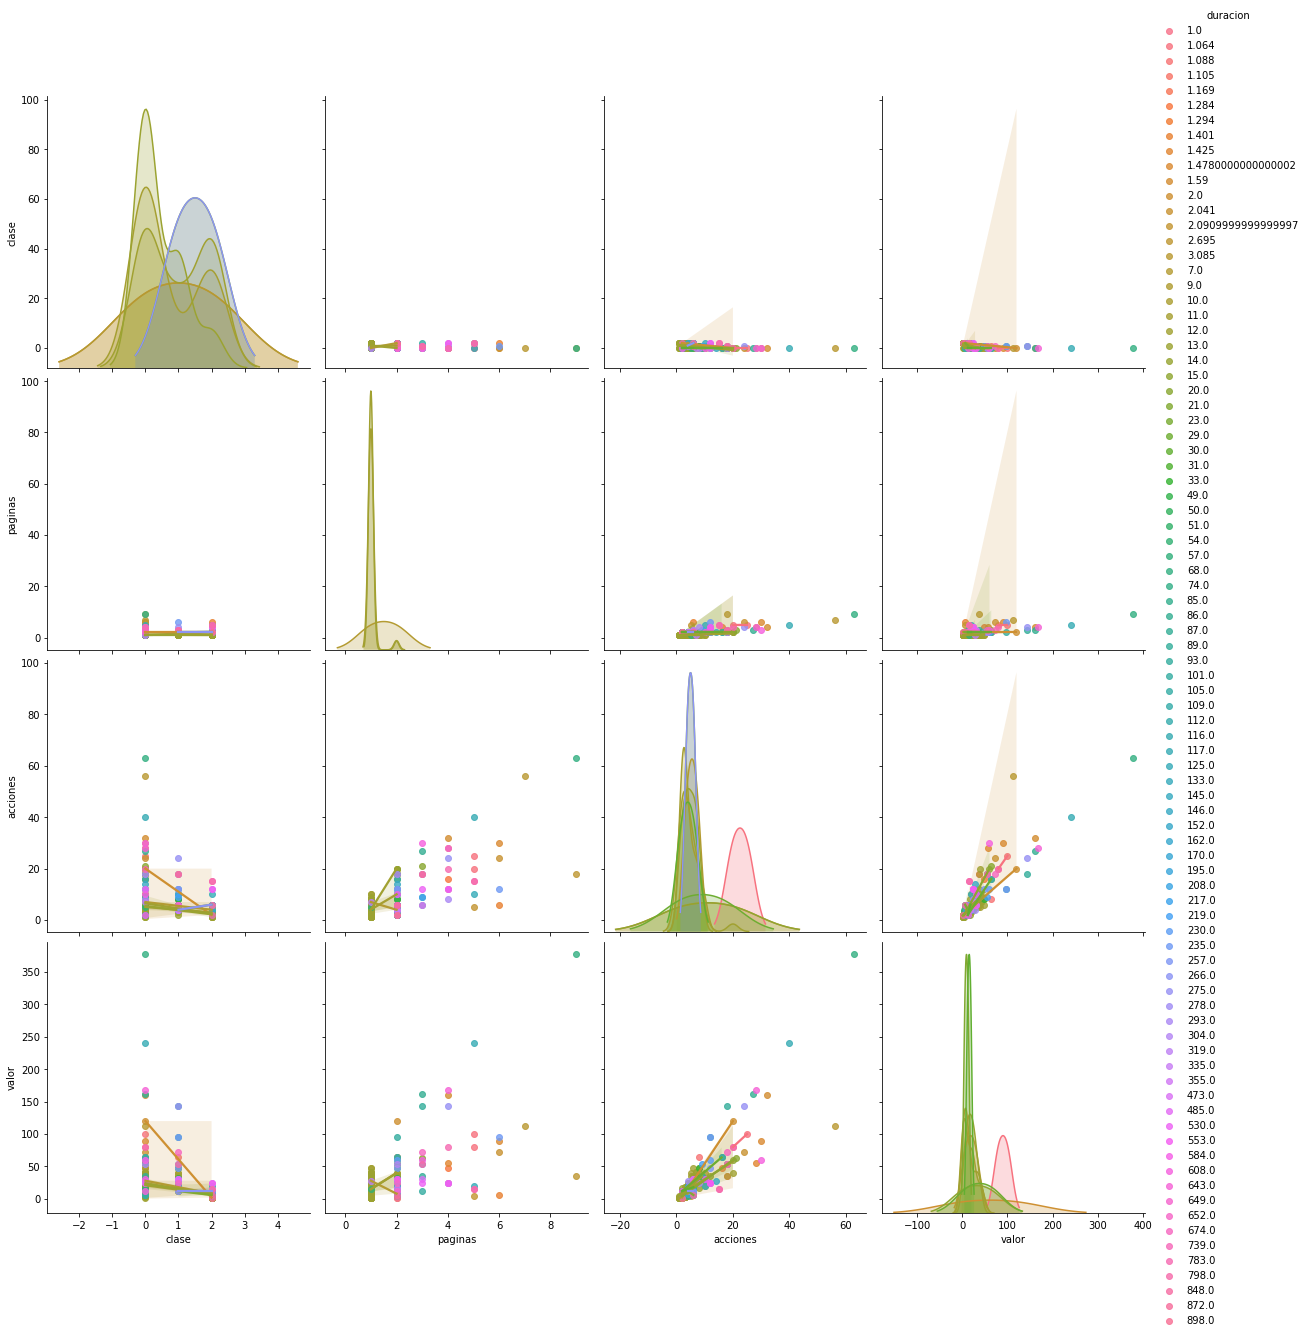

In [12]:
sb.pairplot(dataframe.dropna(), hue='duracion',size=4,vars=["clase", "paginas","acciones","valor"],kind='reg')

In [34]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

I think using X_train[:,0] for plotting (which is from where the error originates) should solve the problem

In [47]:
X_train

array([1, 1, 5, 2, 1, 6, 1, 1, 2, 2, 1, 3, 2, 2, 2, 1, 1, 7, 1, 3, 1, 2,
       2, 3, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 9, 4,
       5, 2, 1, 1, 1, 1, 5, 1, 2, 4, 1, 1, 1, 2, 4, 2, 3, 2, 1, 1, 2, 1,
       2, 1, 2, 6, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 6, 1, 1, 4, 2, 1, 4, 1, 1, 5, 5, 1, 2, 2, 4, 3, 2, 5, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 3, 1, 1, 1, 1, 3, 2, 2, 1, 1, 6, 1,
       2, 1, 1, 9])

In [49]:
X_train.shape

(136, 4)

In [42]:
y_train

array([485.   ,  14.   , 217.   ,  13.   ,  29.   , 152.   ,  13.   ,
       783.   ,  12.   , 112.   ,  33.   ,  12.   ,  13.   ,   1.284,
       848.   ,  50.   ,  12.   , 266.   ,  11.   , 278.   , 105.   ,
        11.   ,  12.   ,  12.   ,  12.   ,  54.   ,  11.   ,  13.   ,
        11.   ,   2.   ,  11.   ,  11.   ,  11.   , 145.   , 230.   ,
        11.   ,  11.   , 275.   , 293.   , 116.   ,  12.   ,  12.   ,
        12.   ,   2.   ,  57.   ,  13.   ,   1.59 ,  12.   ,   7.   ,
        21.   ,  11.   , 872.   , 473.   ,  74.   , 109.   ,  29.   ,
        30.   ,  11.   , 608.   ,  15.   , 652.   ,  11.   ,   1.064,
        51.   , 649.   ,  12.   ,  13.   ,  12.   ,  12.   , 133.   ,
         2.695,  30.   ,  12.   ,  87.   , 798.   ,  10.   ,  12.   ,
        11.   ,  11.   , 335.   ,  11.   ,  12.   , 304.   ,  13.   ,
        13.   ,  12.   , 117.   , 530.   ,  11.   ,  13.   ,  15.   ,
        12.   , 195.   ,   1.478,  13.   , 319.   ,  13.   ,   1.088,
       208.   ,  11.

In [50]:
y_train.shape

(136,)

In [72]:
y_train.reshape(1,-1)

array([[ 11.   ,  30.   ,  12.   ,  13.   ,  12.   , 208.   , 355.   ,
         12.   ,   7.   ,  12.   ,  49.   ,  13.   , 608.   ,  11.   ,
          2.091,  13.   ,  13.   ,  11.   , 319.   , 145.   ,  11.   ,
          1.425,  12.   ,  15.   ,  12.   , 257.   ,  12.   ,  11.   ,
         12.   ,  12.   ,  11.   ,  15.   ,  87.   ,  57.   ,  68.   ,
          1.064,  11.   ,  89.   , 266.   ,  12.   , 584.   ,  13.   ,
         13.   ,  12.   ,   1.064,  12.   ,  11.   ,   2.   ,  12.   ,
         12.   , 116.   ,  12.   ,  11.   , 293.   ,   1.   ,   1.294,
          3.085, 798.   ,  11.   , 152.   ,  13.   ,  74.   ,   1.105,
          1.169,  10.   , 649.   , 101.   ,  12.   ,  12.   , 133.   ,
        230.   , 643.   ,   2.695,  13.   , 553.   ,  12.   ,  13.   ,
        872.   ,   7.   ,  29.   ,  13.   , 674.   , 335.   ,  13.   ,
          2.   ,  50.   ,  31.   ,  12.   , 117.   ,  21.   ,  11.   ,
         11.   ,  12.   ,  51.   ,  13.   ,  11.   ,  21.   , 898.   ,
      

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [76]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC

In [77]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

¿Qué acierto tiene? (score) ¿Cuál es el RMSE? ¿Dirías que es un valor alto? Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión? ¿Es la regresión un buen método para este dataset?

In [78]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [79]:
import sklearn.metrics as metrics
predictions = LogisticRegression(X_test)

In [80]:
predictions = model.predict(X_train)
print(predictions)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
#VALIDACION DEL MODELO

validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: nan (nan)


In [81]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [63]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

TypeError: Expected sequence or array-like, got <class 'sklearn.linear_model._logistic.LogisticRegression'>